In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(formatter={'float': lambda x: "{0:0.6f}".format(x)})
import math as mt

import seaborn as sns
sns.set()

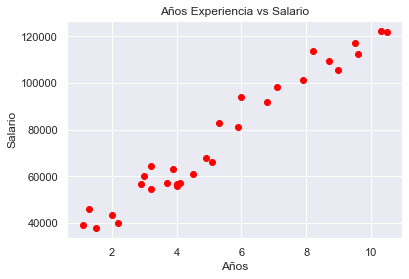

Pesos: [[25792.200199]
 [9449.962321]]


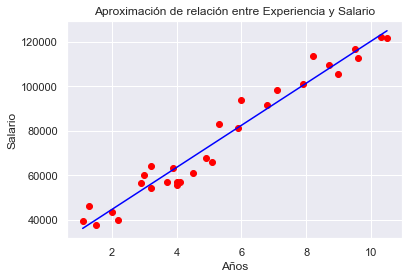

Error: [31.270952]


In [6]:
#GENERAMOS COLUMNA DE UNOS PARA OBTENER LA ORDENADA AL ORIGEN
unos = np.ones(30)
unos = unos.reshape(30,1)

#OBTENEMOS LOS DATOS INDEPENDIENTES X Y LA VARIABLE DEPENDIENTE Y
datos = pd.read_csv("Salary_Data.csv")
x = datos["YearsExperience"].values.reshape(30,1)
y = datos["Salary"].values.reshape(30,1)

#GRAFICAMOS LOS DATOS
plt.scatter(x,y,c='red')
plt.title("Años Experiencia vs Salario")
plt.xlabel("Años")
plt.ylabel("Salario")
plt.show()

#ARMAMOS LA MATRIZ DE DATOS CON COLUMNA DE UNOS PARA LA OBTENCIÓN DE PARAMETROS
X = np.concatenate((unos,x),axis=1)

#CALCULAMOS LA MATRIZ DE PESOS
W = np.linalg.inv(X.T @ X) @ X.T @ y

#MOSTRAMOS LOS PESOS CALCULADOS
print("Pesos: " + str(W))

#CALCULAMOS EL ERROR
d = (y - (X @ W))
C = d.T @ d

#GENERAMOS LA RECTA PARA MOSTRARLA
z_dom = np.linspace(min(x),max(x),30).reshape(30,1)
z_T = np.concatenate((unos,z_dom),axis=1)
z = z_T @ W

#MOSTRAMOS LOS RESULTADOS
plt.scatter(x,y,c='red')
plt.plot(z_dom,z,c='blue')
plt.title("Aproximación de relación entre Experiencia y Salario")
plt.xlabel("Años")
plt.ylabel("Salario")
plt.show()
print("Error: " + str(C[0]))


Regresión Polinomial grado 3

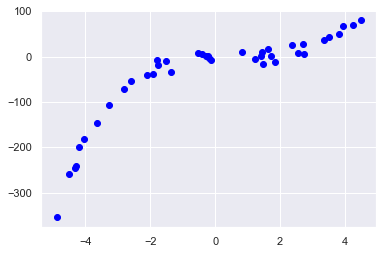

[[-35.387520]
 [30.430960]]


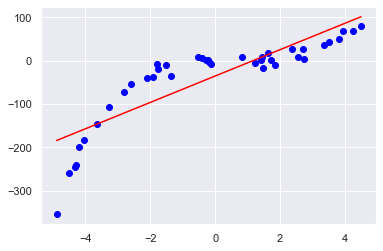

[[6.660864]
 [27.584606]
 [-5.483328]]


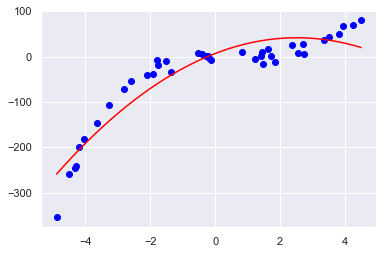

[[4.234016]
 [0.536424]
 [-4.374133]
 [1.949018]]


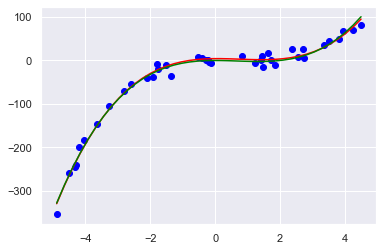

In [26]:
x = np.random.rand(40,1)*10 - 5
y = np.random.normal(0,10,40).reshape(40,1)

x2 = x*x
x3 = x2*x
Y = 2*x3 - 4*x2 + y
plt.scatter(x,Y,c='blue')
plt.show()

unos = np.ones(40)
unos = unos.reshape(40,1)
X  = np.concatenate((unos,x),axis=1)
X2 = np.concatenate((unos,x,x2),axis=1)
X3 = np.concatenate((unos,x,x2,x3),axis=1)
#CALCULAMOS LA MATRIZ DE PESOS
W  = np.linalg.inv(X.T  @ X)  @ X.T  @ Y
W2 = np.linalg.inv(X2.T @ X2) @ X2.T @ Y
W3 = np.linalg.inv(X3.T @ X3) @ X3.T @ Y
print(W)

z_dom = np.linspace(min(x),max(x),40).reshape(40,1)
z_T = np.concatenate((unos,z_dom),axis=1)
z = z_T @ W
#MOSTRAMOS LOS RESULTADOS
plt.scatter(x,Y,c='blue')
plt.plot(z_dom,z,c='red')
plt.show()

print(W2)

z_dom = np.linspace(min(x),max(x),40).reshape(40,1)
z_T = np.concatenate((unos,z_dom,z_dom*z_dom),axis=1)
z = z_T @ W2
#MOSTRAMOS LOS RESULTADOS
plt.scatter(x,Y,c='blue')
plt.plot(z_dom,z,c='red')
plt.show()


print(W3)

z_dom = np.linspace(min(x),max(x),40).reshape(40,1)
z_T = np.concatenate((unos,z_dom,z_dom*z_dom,z_dom*z_dom*z_dom),axis=1)
z = z_T @ W3

estimacion = [2*pow(i,3) - 4*pow(i,2) for i in z_dom]
#MOSTRAMOS LOS RESULTADOS
plt.scatter(x,Y,c='blue')
plt.plot(z_dom,z,c='red')
plt.plot(z_dom,estimacion,c='green')
plt.show()

Regresión exponecial

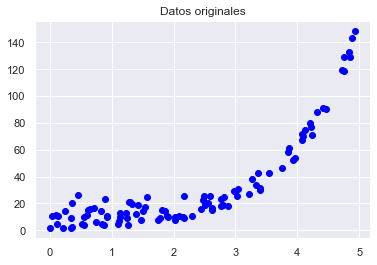

[[-12.940557]
 [20.223617]]


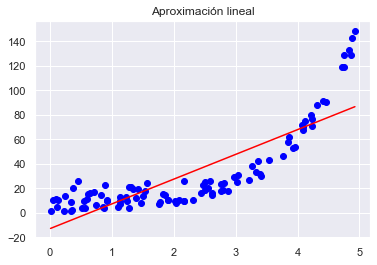

[[1.563048]
 [0.623941]]


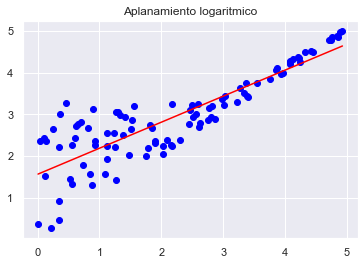

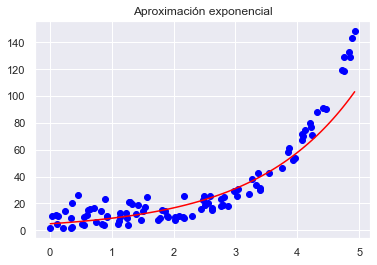

In [70]:
n = 100

x = np.random.rand(n,1)*5
y = np.random.normal(0,10,n).reshape(n,1)

x2 = np.array([mt.exp(i) for i in x]).reshape(n,1)
Y = x2 + abs(y)
plt.title("Datos originales")
plt.scatter(x,Y,c='blue')
plt.show()

unos = np.ones(n).reshape(n,1)
X  = np.concatenate((unos,x),axis=1)
#CALCULAMOS LA MATRIZ DE PESOS
W  = np.linalg.inv(X.T  @ X)  @ X.T  @ Y
print(W)

z_dom = np.linspace(min(x),max(x),n).reshape(n,1)
z_T = np.concatenate((unos,z_dom),axis=1)
z = z_T @ W
#MOSTRAMOS LOS RESULTADOS
plt.title("Aproximación lineal")
plt.scatter(x,Y,c='blue')
plt.plot(z_dom,z,c='red')
plt.show()

lnY = np.array([mt.log(i) for i in Y]).reshape(n,1)

We = np.linalg.inv(X.T  @ X)  @ X.T  @ lnY
print(We)
z = z_T @ We
plt.title("Aplanamiento logaritmico")
plt.scatter(x,lnY,c='blue')
plt.plot(z_dom,z,c='red')
plt.show()


z_T = np.concatenate((unos,z_dom),axis=1)
z = np.array([mt.exp(i @ We) for i in z_T]).reshape(n,1)

#MOSTRAMOS LOS RESULTADOS
plt.title("Aproximación exponencial")
plt.scatter(x,Y,c='blue')
plt.plot(z_dom,z,c='red')
plt.show()


Aprendizaje por descenso en gradiente

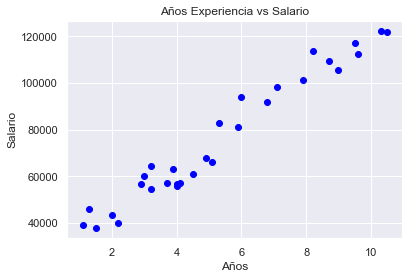

Iteraciones necesarias: 6

Pesos Gradiente: 
[[25792.200199]
 [9449.962321]]

Pesos MC: 
[[25792.200199]
 [9449.962321]]

Diferencia: 
[[0.000000]]


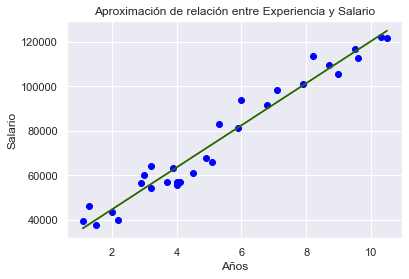

Error: [938128551.668430]
R^2 : 0.9569566641435086
R^2 : 0.9569566641435086


In [127]:
#DEFINIMOS EL GRADIENTE EN FUNCIÓN DE LOS PARAMETROS Y LAS MATRICES DE DATOS

def gradienteCosto(X,Y,W):
    
    return 2*(W.T @ X.T @ X - Y.T @ X).T

#GENERAMOS COLUMNA DE UNOS PARA OBTENER LA ORDENADA AL ORIGEN
unos = np.ones(30)
unos = unos.reshape(30,1)

#OBTENEMOS LOS DATOS INDEPENDIENTES X Y LA VARIABLE DEPENDIENTE Y
x = datos["YearsExperience"].values.reshape(30,1)
y = datos["Salary"].values.reshape(30,1)

#GRAFICAMOS LOS DATOS
plt.scatter(x,y,c='blue')
plt.title("Años Experiencia vs Salario")
plt.xlabel("Años")
plt.ylabel("Salario")
plt.show()

#ARMAMOS LA MATRIZ DE DATOS CON COLUMNA DE UNOS PARA LA OBTENCIÓN DE PARAMETROS
X = np.concatenate((unos,x),axis=1)

iteraciones = 0
alfa = 0.1
W = np.zeros((X.shape[1],1))
W0 = W
dG = np.ones((X.shape[1],1))

    
while(dG.T @ dG > 0.0001):

    iteraciones += 1
    W = W - alfa*gradienteCosto(X,y,W)
    dT = W - W0
    dG = gradienteCosto(X,y,W) - gradienteCosto(X,y,W0)
    alfa = (dG.T @ dT)/(dG.T @ dG)
    W0 = W
    
print("Iteraciones necesarias: " + str(iteraciones) + "\n")

#MOSTRAMOS LOS PESOS CALCULADOS
print("Pesos Gradiente: \n" + str(W) + "\n")
WM  = np.linalg.inv(X.T  @ X)  @ X.T  @ y
print("Pesos MC: \n" + str(WM) + "\n")

print("Diferencia: \n" + str((W - WM).T @ (W - WM)))

#CALCULAMOS EL ERROR
d = (y - (X @ W))
C = d.T @ d

#GENERAMOS LA RECTA PARA MOSTRARLA
z_dom = np.linspace(min(x),max(x),30).reshape(30,1)
z_T = np.concatenate((unos,z_dom),axis=1)
z = z_T @ W
z2 = z_T @ WM

#MOSTRAMOS LOS RESULTADOS
plt.scatter(x,y,c='blue')
plt.plot(z_dom,z,c='red')
plt.plot(z_dom,z2,c='green')
plt.title("Aproximación de relación entre Experiencia y Salario")
plt.xlabel("Años")
plt.ylabel("Salario")
plt.show()
print("Error: " + str(C[0]))

SSRes = C
ym = np.mean(y)
SSTot = (y - ym).T @ (y - ym)
R2 = 1 - (SSRes/SSTot)

print("R^2 : " + str(R2[0][0]))


SSRes = (y - (X @ WM)).T @ (y - (X @ WM))
R2 = 1 - (SSRes/SSTot)

print("R^2 : " + str(R2[0][0]))
